In [317]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scipy
import scipy.stats as stats

In [219]:
X = pd.read_csv('flights_NY.csv')

In [220]:
X.head()

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier tailnum  \
0  2013      1    1     517.0        2.0     830.0       11.0      UA  N14228   
1  2013      1    1     533.0        4.0     850.0       20.0      UA  N24211   
2  2013      1    1     542.0        2.0     923.0       33.0      AA  N619AA   
3  2013      1    1     544.0       -1.0    1004.0      -18.0      B6  N804JB   
4  2013      1    1     554.0       -6.0     812.0      -25.0      DL  N668DN   

   flight origin dest  air_time  distance  
0    1545    EWR  IAH     227.0      1400  
1    1714    LGA  IAH     227.0      1416  
2    1141    JFK  MIA     160.0      1089  
3     725    JFK  BQN     183.0      1576  
4     461    LGA  ATL     116.0       762

In [221]:
print(f'Number of columns: {len(X.columns)}')

Number of columns: 14


В задании сказано, что датасет содержит 13 колонок, хотя мы видим, что их 14. В описании не было сказано про колонку с названием <code>air_time</code>, которая, скорее всего, обозначает время полета. Оставим этот столбец, тк он может быть полезен в дальнейшем.

## Пункт 1

#### Колонки, содержащие пропущенные занчения

In [234]:
na_columns = X.isna().any()

for name, isna in dict(na_columns).items():
    if isna: print(name)

dep_time
dep_delay
arr_time
arr_delay
tailnum
air_time


#### Кол-во строк, содержащих пропущенные значения

In [235]:
X_t_na = X.T.isna()
X_t_na.head()

0       1       2       3       4       5       6       7       \
year        False   False   False   False   False   False   False   False   
month       False   False   False   False   False   False   False   False   
day         False   False   False   False   False   False   False   False   
dep_time    False   False   False   False   False   False   False   False   
dep_delay   False   False   False   False   False   False   False   False   

           8       9       ...  336766  336767  336768  336769  336770  \
year        False   False  ...   False   False   False   False   False   
month       False   False  ...   False   False   False   False   False   
day         False   False  ...   False   False   False   False   False   
dep_time    False   False  ...   False   False   False   False    True   
dep_delay   False   False  ...   False   False   False   False    True   

           336771  336772  336773  336774  336775  
year        False   False   False   False   False  
month       False   False   False   False   False  
day         False   False   False   False   False  
dep_time     True    True    True    True    True  
dep_delay    True    True    True    True    True  

[5 rows x 336776 columns]

In [236]:
X_t_na = X_t_na.any()
X_t_na

0         False
1         False
2         False
3         False
4         False
          ...  
336771     True
336772     True
336773     True
336774     True
336775     True
Length: 336776, dtype: bool

In [238]:
print(f'Кол-во строк, содержащих пропущенные значения: {len(X_t_na[X_t_na])}')

Кол-во строк, содержащих пропущенные значения: 9430


#### Посмторим на строки с пропущенными значениями

In [239]:
X[X_t_na]

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
471     2013      1    1    1525.0       -5.0    1934.0        NaN      MQ   
477     2013      1    1    1528.0       29.0    2002.0        NaN      EV   
615     2013      1    1    1740.0       -5.0    2158.0        NaN      MQ   
643     2013      1    1    1807.0       29.0    2251.0        NaN      UA   
725     2013      1    1    1939.0       59.0      29.0        NaN      9E   
...      ...    ...  ...       ...        ...       ...        ...     ...   
336771  2013      9   30       NaN        NaN       NaN        NaN      9E   
336772  2013      9   30       NaN        NaN       NaN        NaN      9E   
336773  2013      9   30       NaN        NaN       NaN        NaN      MQ   
336774  2013      9   30       NaN        NaN       NaN        NaN      MQ   
336775  2013      9   30       NaN        NaN       NaN        NaN      MQ   

       tailnum  flight origin dest  air_time  distance  
471     N719MQ    4525    LGA  XNA       NaN      1147  
477     N17108    3806    EWR  STL       NaN       872  
615     N739MQ    4413    LGA  XNA       NaN      1147  
643     N31412    1228    EWR  SAN       NaN      2425  
725     N905XJ    3325    JFK  DFW       NaN      1391  
...        ...     ...    ...  ...       ...       ...  
336771     NaN    3393    JFK  DCA       NaN       213  
336772     NaN    3525    LGA  SYR       NaN       198  
336773  N535MQ    3461    LGA  BNA       NaN       764  
336774  N511MQ    3572    LGA  CLE       NaN       419  
336775  N839MQ    3531    LGA  RDU       NaN       431  

[9430 rows x 14 columns]

У всех данных рейсов отсутсвует задежка прибытия

In [240]:
X[X_t_na]['arr_delay'].isna().all()

True

Также отсутсвует указание времени полета

In [241]:
X[X_t_na]['air_time'].isna().all()

True

У большинства данных рейсов отсутсвует указание:
1. Времени отправления
2. Задрежки отправления
3. Времени прибытия 

In [242]:
dep_time = X[X_t_na]['dep_time'].isna()
print(f'Num of NA in dep_time: {len(X[X_t_na]["dep_time"][dep_time == True])}')

Num of NA in dep_time: 8255


In [243]:
dep_delay = X[X_t_na]['dep_delay'].isna()
print(f'Num of NA in dep_delay: {len(X[X_t_na]["dep_delay"][dep_delay == True])}')

Num of NA in dep_delay: 8255


In [244]:
arr_time = X[X_t_na]['arr_time'].isna()
print(f'Num of NA in arr_time: {len(X[X_t_na]["arr_time"][arr_time == True])}')

Num of NA in arr_time: 8713


**Вывод:** Скорее всего полеты с пропущенными значениями - это полеты, которые были отменены. Видимо их либо отменяли заранее, либо разворачивали на взлетной полосе.

Уберем строки с пропущенным значениями

In [245]:
X = X.dropna()

In [246]:
X

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
0       2013      1    1     517.0        2.0     830.0       11.0      UA   
1       2013      1    1     533.0        4.0     850.0       20.0      UA   
2       2013      1    1     542.0        2.0     923.0       33.0      AA   
3       2013      1    1     544.0       -1.0    1004.0      -18.0      B6   
4       2013      1    1     554.0       -6.0     812.0      -25.0      DL   
...      ...    ...  ...       ...        ...       ...        ...     ...   
336765  2013      9   30    2240.0       -5.0    2334.0      -17.0      B6   
336766  2013      9   30    2240.0      -10.0    2347.0      -20.0      B6   
336767  2013      9   30    2241.0       -5.0    2345.0      -16.0      B6   
336768  2013      9   30    2307.0       12.0    2359.0        1.0      B6   
336769  2013      9   30    2349.0      -10.0     325.0      -25.0      B6   

       tailnum  flight origin dest  air_time  distance  
0       N14228    1545    EWR  IAH     227.0      1400  
1       N24211    1714    LGA  IAH     227.0      1416  
2       N619AA    1141    JFK  MIA     160.0      1089  
3       N804JB     725    JFK  BQN     183.0      1576  
4       N668DN     461    LGA  ATL     116.0       762  
...        ...     ...    ...  ...       ...       ...  
336765  N354JB    1816    JFK  SYR      41.0       209  
336766  N281JB    2002    JFK  BUF      52.0       301  
336767  N346JB     486    JFK  ROC      47.0       264  
336768  N565JB     718    JFK  BOS      33.0       187  
336769  N516JB     745    JFK  PSE     196.0      1617  

[327346 rows x 14 columns]

## Пункт 2

Нормализованная гистограмма - это гистограмма, которая была масштабирована таким образом, чтобы общая площадь под кривой была равна 1.<br>Для этого частоту каждого интервала делят на общее количество данных и затем делят на ширину интервала.

В numpy для этого есть специальная функция <code>np.histogram(density=True)</code>

In [247]:
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')

In [353]:
## Построим нормализованные гистограммы с количеством корзин, определяемым правилом Фридмана Диакониса
hist_dep_delay, bins_dep_delay = np.histogram(X['dep_delay'], bins='fd', density=True)
hist_arr_delay, bins_arr_delay = np.histogram(X['arr_delay'], bins='fd', density=True)

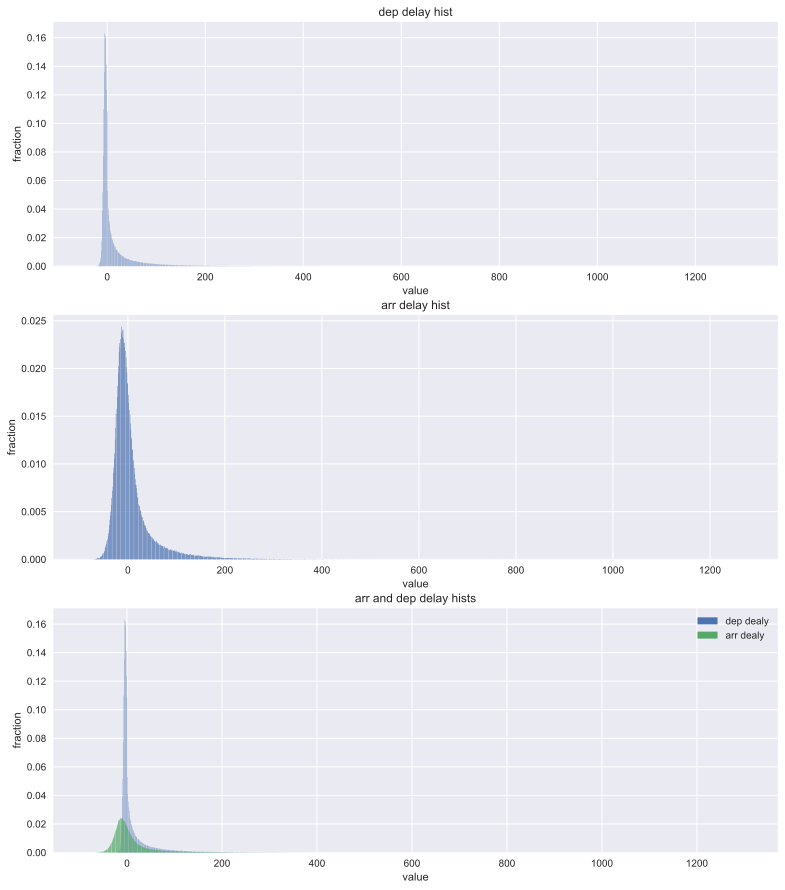

In [354]:
fig, ax = plt.subplots(3)
fig.set_size_inches(13, 15)

ax[0].set_title('dep delay hist')
ax[0].hist(bins_dep_delay[:-1], bins_dep_delay, weights=hist_dep_delay)
ax[0].set_xlabel('value')
ax[0].set_ylabel('fraction')

ax[1].set_title('arr delay hist')
ax[1].hist(bins_arr_delay[:-1], bins_arr_delay, weights=hist_arr_delay)
ax[1].set_xlabel('value')
ax[1].set_ylabel('fraction')

ax[2].set_title('arr and dep delay hists')
ax[2].hist(bins_dep_delay[:-1], bins_dep_delay, weights=hist_dep_delay, label="dep dealy")
ax[2].hist(bins_arr_delay[:-1], bins_arr_delay, weights=hist_arr_delay, label="arr dealy")
ax[2].legend()
ax[2].set_xlabel('value')
ax[2].set_ylabel('fraction')

plt.show()

#### Ограничим диапазон построения гисторграмм с помощью метода межквартильного размаха (метода Тьюки)

$$IQR = Q3 - Q1, \ Q1 \ \text{и} \ Q3 - \text{первый и третий квартили,} \ IQR - \text{межквартильное расстояние}$$<br>
$$X1 = Q1 - 1.5 \cdot IQR, \ X2 = Q3 + 1.5 \cdot IQR$$
Значения, меньшие $X1$ или большие $X2$ -  выбросы.<br>
Ограничим диапазон гистограммы отрезком $[X1, X2]$

In [355]:
def iqr_out_detect(data):
    '''
    Find outliers and with IQR method.
    :param ndarray data: Array with values
    :return: Tuple with x1, x2 and outliers from data
    '''
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    x1, x2 = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return x1, x2, data[(data < x1) | (data > x2)]


Построим те же гистограммы, но ограничим диапазон и выкинем выбросы из данных

<small> Достаточно только ограничить диапазонон, но без выбросов построение займет меньше времени, а результат идентичен</small>

In [356]:
dep_x1, dep_x2, dep_out = iqr_out_detect(X['dep_delay'])
arr_x1, arr_x2, arr_out = iqr_out_detect(X['arr_delay'])

In [357]:
## Построим гистограммы с количеством корзин, определяемым правилом Фридмана Диакониса
hist_dep_delay, bins_dep_delay = np.histogram(X['dep_delay'][(X['dep_delay'] >= dep_x1) & (X['dep_delay'] <= dep_x2)], bins='fd', density=True)
hist_arr_delay, bins_arr_delay = np.histogram(X['arr_delay'][(X['arr_delay'] >= arr_x1) & (X['arr_delay'] <= arr_x2)], bins='fd', density=True)

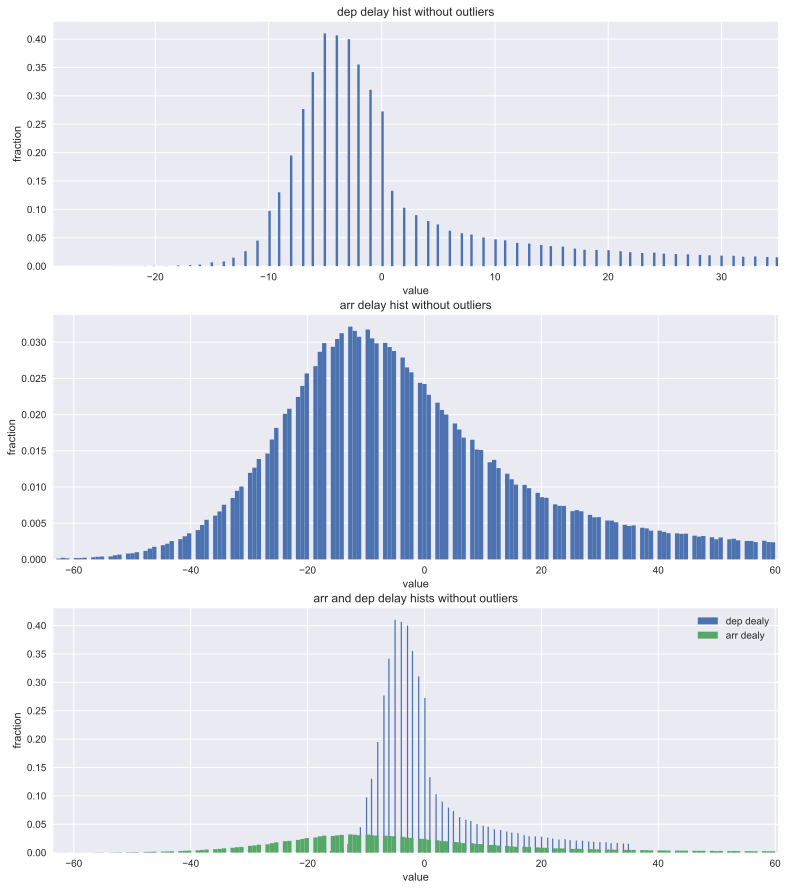

In [358]:
fig, ax = plt.subplots(3)
fig.set_size_inches(13, 15)

ax[0].set_title('dep delay hist without outliers')
ax[0].hist(bins_dep_delay[:-1], bins_dep_delay, weights=hist_dep_delay)
ax[0].set_xlabel('value')
ax[0].set_ylabel('fraction')

ax[1].set_title('arr delay hist without outliers')
ax[1].hist(bins_arr_delay[:-1], bins_arr_delay, weights=hist_arr_delay)
ax[1].set_xlabel('value')
ax[1].set_ylabel('fraction')

ax[2].set_title('arr and dep delay hists without outliers')
ax[2].hist(bins_dep_delay[:-1], bins_dep_delay, weights=hist_dep_delay, label="dep dealy")
ax[2].hist(bins_arr_delay[:-1], bins_arr_delay, weights=hist_arr_delay, label="arr dealy")
ax[2].legend()
ax[2].set_xlabel('value')
ax[2].set_ylabel('fraction')

## Ограничим диапазон гистограмм
ax[0].set_xlim(dep_x1, dep_x2)
ax[1].set_xlim(arr_x1, arr_x2)
ax[2].set_xlim(min(dep_x1, arr_x1), max(dep_x2, arr_x2))

plt.show()

Характер выбросов

In [359]:
print(f'Кол-во выбросов для dep_delay: {len(dep_out)}')
print(f'Диапазон их значений: [{dep_out.min()}, {dep_x1}] & [{dep_x2}, {dep_out.max()}]\n\n')

print(f'Кол-во выбросов для arr_delay: {len(arr_out)}')
print(f'Диапазон их значений: [{arr_out.min()}, {arr_x1}] & [{arr_x2}, {arr_out.max()}]')

Кол-во выбросов для dep_delay: 42857
Диапазон их значений: [-43.0, -29.0] & [35.0, 1301.0]


Кол-во выбросов для arr_delay: 27880
Диапазон их значений: [-86.0, -63.5] & [60.5, 1272.0]


Из особенностей полученных распределний я бы выделил:    
    
1. Центр обоих распределений приходится на значения меньше нуля

2. Оба распределения несимметричны относительно центра и имеют длинный правый хвост
    


## Пункт 3

In [404]:
print("Время задержки вылета")
print(f'Оценка среднего: {X["dep_delay"].mean()}')
print(f'Оценка медианы: {X["dep_delay"].median()}')
print(f'Оценка стандратного отклонения: {X["dep_delay"].std()}')
print()
print("Время задержки прилета")
print(f'Оценка среднего: {X["arr_delay"].mean()}')
print(f'Оценка медианы: {X["arr_delay"].median()}')
print(f'Оценка стандратного отклонения: {X["arr_delay"].std()}')

Время задержки вылета
Оценка среднего: 12.555155706805643
Оценка медианы: -2.0
Оценка стандратного отклонения: 40.06568758558352

Время задержки прилета
Оценка среднего: 6.89537675731489
Оценка медианы: -5.0
Оценка стандратного отклонения: 44.63329169019399


## Пункт 4

$$\bar{X} \pm z * \frac{\sigma}{\sqrt{n}}$$

При $z = 1.96$ сл.в. с вер-тью 95% попадет в заданный интервал

In [361]:
samp_mean = X.groupby('carrier').mean(numeric_only=True).sort_values('dep_delay').dep_delay.rename('mean')
samp_std = X.groupby('carrier').std(numeric_only=True).sort_values('dep_delay').dep_delay
sqrt_n = X.groupby('carrier').count().dep_delay ** (1/2)
z_score = 1.96

ci_lower = (samp_mean - z_score * (samp_std / sqrt_n)).rename('ci_lower')
ci_upper = (samp_mean + z_score * (samp_std / sqrt_n)).rename('ci_upper')

In [362]:
data = pd.concat([samp_mean, ci_lower, ci_upper], axis=1)
data

mean   ci_lower   ci_upper
carrier                                 
US        3.744693   3.355830   4.133555
HA        4.900585  -2.953928  12.755098
AS        5.830748   3.517442   8.144054
AA        8.569130   8.159389   8.978871
DL        9.223950   8.867909   9.579991
MQ       10.445381   9.961977  10.928785
UA       12.016908  11.727058  12.306759
OO       12.586207  -3.088215  28.260629
VX       12.756646  11.550489  13.962803
B6       12.967548  12.643977  13.291119
9E       16.439574  15.761620  17.117529
WN       17.661657  16.889455  18.433859
FL       18.605984  16.780116  20.431853
YV       18.898897  14.767364  23.030430
EV       19.838929  19.436248  20.241611
F9       20.201175  15.814579  24.587771

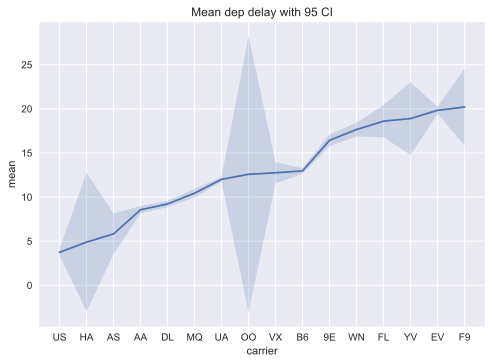

In [363]:
fig, ax = plt.subplots()
ax.set_title('Mean dep delay with 95 CI')

sns.lineplot(data=data, y='mean', x=np.arange(len(data['mean'])), ax=ax)

plt.fill_between(np.arange(len(data['mean'])), data['ci_lower'], data['ci_upper'], alpha=0.2)

ax.set_xlabel('carrier')
ax.set_xticks(np.arange(len(samp_mean)), list(samp_mean.index))
plt.show()

## Пункт 5

Предположим, что данные распределены нормально.

Стандартное отклонение генеральной совокупности неизвестно - воспользуемся <i>t-тестом Уэлча</i>. Это модификация <i>t-теста Стьюдента</i> но без предположения о равенстве дисперсий выборок.

1. Нулевая гипотеза (H0) - среднее время задержки вылета для AA и DL равны, альтернативная гипотеза (H1) - среднее время задержки различается
2. Воспользуемся двухвыборочным t-тестом Уэлча для независимых выборок и посчитаем t-статистику    
3. Вычислим p-уровень значимости (p-value, p-значение) используя распределения Стьюдента

$$t-статистика: \ t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

$$p-значение: \ p = 2 * min\{P(T \geq t \ | \ H_0), P(T \leq t \ | \ H_0)\}$$

$T$ - приблизительно из распределения Стюдента.

Воспользуемся scipy для точного рассчета p-value (иначе можно использовать таблицу - t-table или калькулятор распределения Стьюдента)


In [364]:
t, p = stats.ttest_ind(X[X['carrier']=='AA']['dep_delay'], X[X['carrier']=='DL']['dep_delay'], equal_var=False)

In [365]:
print(f"t-значение: {t}")
print(f"p-значение: {p}")

t-значение: -2.364408423276974
p-значение: 0.018061559157334144


Тогда мы отвергаем нулевую гипотезу $H_0$ при установелнном уровне значимости $\alpha \geq 0.018061559157334144$

Ответ на вопрос "Значимо ли различие в среднем времени задержки вылета для авиакомпаний
American Airlines (AA) и Delta Airlines (DL)?"зависит как раз от установленного уровня значимости.<br><br>
Мы имеем дело с большой выборкой, состоящей из десятков тысяч наблюдений, поэтому уровень значимости логично установить небольшим.    
Это позволяет уменьшить вероятность ошибки первого рода (отвергнуть правильную нулевую гипотезу) при сохранении достаточной мощности теста (способности обнаруживать реальные различия, если они есть).<br><br>
Пусть $\alpha=0.001$ - <b>При таком уровне различия не являются статистически значимыми</b>

## Пункт 6

Установим уровень значимости $\alpha = 0.001$

Для сравнения трех групп используем <i>Однофакторный Дисперсионный Анализ (One Way ANOVA F-test)</i>.<br>
Здесь независимый (категориальный) признак это название аэропорта, а зависимый - значение задержки вылета.

1. Нулевая гипотеза (H0) - среднее время задержки вылета всех аэропортов равно,<br> альтернативная гипотеза (H1) - среднее время задержки хотя бы двух - различается
2. Воспользуемся Однофакторным Дисперсионный Анализом и вычислим F - статистику 
3. Вычислим p-уровень значимости (p-value, p-значение) используя распределение Фишера

$$F - статистика: \ f = \frac{\frac{SSB}{m - 1}}{\frac{SSW}{n - m}}$$

$SSB$ - sum of squares between groups<br>
$SSW$ - sum of squares within groups<br>
$n$ - общее число наблюдений зависимого признака, m - число групп<br>
($m - 1$, $n - m$ - число степеней свободы)

$$p - значение: p = P(F > f \ | \ H_0)$$

где $F$ - из распределения Фишера

Воспользуемся scipy для точного рассчета p-value 

In [367]:
f, p = stats.f_oneway(X[X['origin'] == 'JFK']['dep_delay'], 
                      X[X['origin'] == 'LGA']['dep_delay'], 
                      X[X['origin'] == 'EWR']['dep_delay'])

In [368]:
print(f"f-значение: {f}")
print(f"p-значение: {p}")

f-значение: 392.3539088643125
p-значение: 6.408773574198642e-171


In [369]:
if p < 0.001 :
    print('Различия статистически значимы')
else:
    print('Средние равны, принимаем нулевую гипотезу')

Различия статистически значимы


<u>Ответ:</u> <b>Различия статистически значимы</b>

## Пункт 7

Чтобы сделать предположение о распределении еще раз взглянем на нормализованную гистограмму

In [405]:
X_dep_gz = X['dep_delay'][(X['dep_delay'] > 0)]
X_dep_gz_no = X['dep_delay'][(X['dep_delay'] > 0) & (X['dep_delay'] <= dep_x2)]

In [406]:
## Построим гистограммы с количеством корзин, определяемым правилом Фридмана Диакониса
hist_dep_delay, bins_dep_delay = np.histogram(X_dep_gz, bins='fd', density=True)
hist_dep_delay_no, bins_dep_delay_no = np.histogram(X_dep_gz_no, bins='fd', density=True)

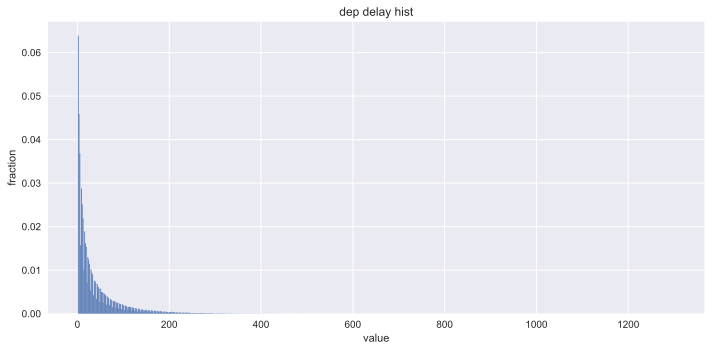

In [410]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax.set_title('dep delay hist')
ax.hist(bins_dep_delay[:-1], bins_dep_delay, weights=hist_dep_delay)
ax.set_xlabel('value')
ax.set_ylabel('fraction')

fig.tight_layout()
plt.show()

In [411]:
print(f"Сдвиг распределения относительно нуля: {X_dep_gz.min()}")

Сдвиг распределения относительно нуля: 1.0


С виду похоже на <i>Экспоненциа́льное Распределение</i>, но сдвинутое относительно своего центра (точки 0) на 1 вправо.<br> Чтобы учесть это можем использовать параметр $loc = 1$ и подставлять в функцию распределения не $x$, а $(x - loc)$.

$$ p(x \ |  \ \lambda) =
  \begin{cases}
    \lambda * e^{-\lambda*(x - loc)}       &, x - loc \geq 0\\
    0                                      &, x - loc < 0
  \end{cases}
$$

оценим параметр $\lambda$ Методом Максимального Правдоподия:

$$likelihood: L(\lambda \ | \ X) = \prod_{i = 1}^n p(\lambda \ | \ x_i) = \lambda^n * e^{-\lambda * \sum_{i=1}^n (x_i - loc)} $$

$$loglikelihood: l(\lambda) = Ln(L(\lambda \ | \ X)) = n * ln(\lambda) - \lambda * \sum_{i=1}^n (x_i - loc)$$

$$l' = \frac{n}{\lambda} - \sum_{i=1}^n (x_i - loc)$$

$$l' = 0 \leftrightarrow \lambda = \frac{n}{\sum_{i=1}^n (x_i - loc)} = \frac{1}{\bar{X} - loc}$$



In [412]:
loc = 1
lam = 1 / (X_dep_gz.mean() - loc)
print(f'lambda = {lam}')

lambda = 0.026152355769486674


In [413]:
## Реализация функции плотности экспоненицального распределения
def expon_pdf(lam, x): return lam * np.exp(-lam * x)

Постром ее график не на всех точках выборки (тк это очень долго), а на точках, равномерно распределенных по множеству значений выборки<br>
<small>1000 точек хватит</small>

In [414]:
x = np.linspace(loc, X_dep_gz.max(), 1000)
x_no = np.linspace(loc, X_dep_gz_no.max(), 1000)

y = expon_pdf(lam, x)
y_no = expon_pdf(lam, x_no)

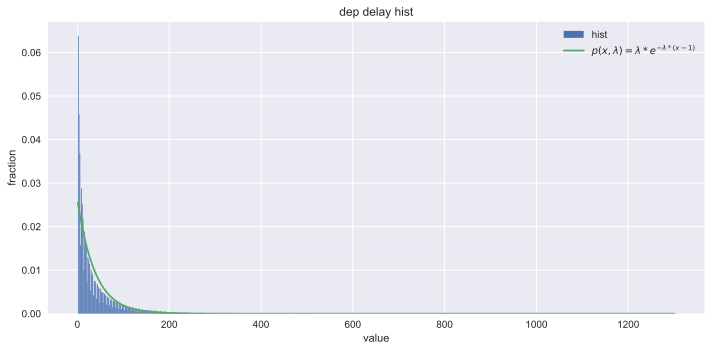

In [416]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax.set_title('dep delay hist')
ax.hist(bins_dep_delay[:-1], bins_dep_delay, weights=hist_dep_delay, label='hist')
ax.set_xlabel('value')
ax.set_ylabel('fraction')

ax.plot(x, y, label=r'$p(x, \lambda) = \lambda * e^{-\lambda*(x - 1)}$')
ax.legend()

fig.tight_layout()
plt.show()

Попробуем распределение, похожее на показательное, но с большим числом параметров - <i>Экспоненцированное Распределение Вейбулла</i>.

$$ p\left(x | k, \lambda, \alpha\right) =
  \begin{cases}
    \alpha * \frac{k}{\lambda} * \left[\frac{x-loc}{\lambda}\right]^{k-1} * \left[ 1 - e^{-((x-loc)/\lambda)^k}\right]^{\alpha-1} * e^{-((x-loc)/\lambda)^k}      &, x - loc \geq 0\\
    0                                      &, x - loc < 0
  \end{cases}
$$

Я не буду выписывать функцию правдоподобия и искать оптимальные параметры вручную - вместо этого воспользуемся scipy и методом rv_continuous.fit().<br>
Он также использует Метод Максимального Правдопобия (MLE).<br>В scipy все распределения стандартизованы, поэтому помимо параметров распределния предсказывается еще $loc$ - сдвиг распределения относительно его центра. В нашем случае $loc = 1$. ($scale = \lambda$)

In [431]:
a, k, loc, scale = stats.exponweib.fit(X_dep_gz)

In [432]:
print(f'alpha = {a:.2f}')
print(f'k = {k:.2f}')
print(f'lambda = {scale:.2f}')
print(f'Сдвиг = {loc:.2f} - действительно 1, как мы и рассчитали до этого')

alpha = 2.17
k = 0.36
lambda = 6.06
Сдвиг = 1.00 - действительно 1, как мы и рассчитали до этого


In [420]:
x = np.linspace(loc, X_dep_gz.max(), 1000)
x_no = np.linspace(loc, X_dep_gz_no.max(), 1000)

y = stats.exponweib.pdf(x, a, k, loc, scale)
y_no = stats.exponweib.pdf(x_no, a, k, loc, scale)

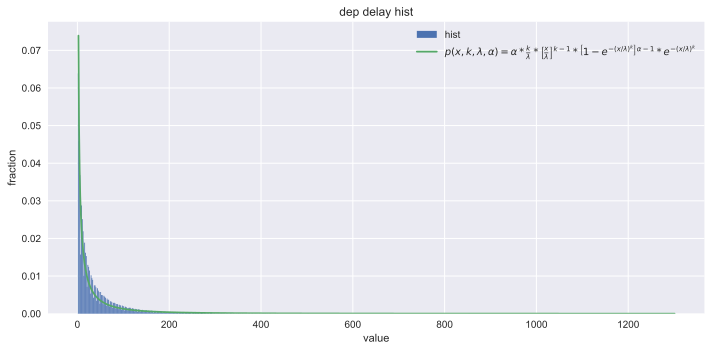

In [422]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax.set_title('dep delay hist')
ax.hist(bins_dep_delay[:-1], bins_dep_delay, weights=hist_dep_delay, label='hist')
ax.set_xlabel('value')
ax.set_ylabel('fraction')

ax.plot(x, y, label=r'$p \left(x, k, \lambda, \alpha \right) = \alpha * \frac{k}{\lambda} * \left[\frac{x}{\lambda}\right]^{k-1} * \left[ 1 - e^{-(x/\lambda)^k}\right]^{\alpha-1} * e^{-(x/\lambda)^k}$')
ax.legend()

fig.tight_layout()
plt.show()

Под данную гистограмму также подходит еще одно распределение - <i>Распределение Парето</i>

$$ p\left(x | \alpha\right) =
  \begin{cases}
    \frac{\alpha * x_m^\alpha}{(x-loc)^{\alpha+1}}       &, x \geq x_m + loc\\
    0                                      &, x < x_m + loc
  \end{cases}
$$

$$l\left(\alpha, x_m\right) = Ln(L(\alpha, x_m | X)) = n * ln(\alpha) + n * \alpha * ln(x_m) - (\alpha + 1) \sum_{i=1}^n ln(x_i-loc)$$

при фиксированном $x_m$

$$l'_\alpha =  \frac{n}{\alpha} + n * ln(x_m) - \sum_{i=1}^n ln(x_i-loc)$$

$$l' = 0 \leftrightarrow \alpha = \frac{n}{\sum_{i=1}^n ln(x_i-loc) - n * ln(x_m)}$$

Воспользуемся scipy для нахождения оптимальных параметров.

In [477]:
a, loc, x_m = stats.pareto.fit(X_dep_gz)
a, loc, x_m

(1.980830791170319, -41.287633634476165, 42.28763363447616)

In [478]:
print(f'{loc + x_m:.2f} - равно 1')

1.00 - равно 1


In [470]:
x = np.linspace(1, X_dep_gz.max(), 1000)
x_no = np.linspace(1, X_dep_gz_no.max(), 1000)

y = stats.pareto.pdf(x, a, loc, x_m)
y_no = stats.pareto.pdf(x_no, a, loc, x_m)

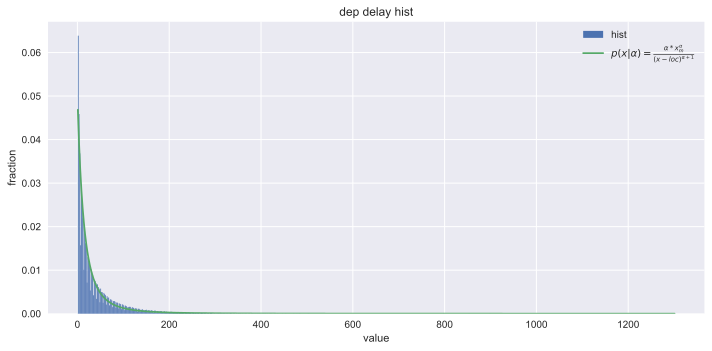

In [479]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax.set_title('dep delay hist')
ax.hist(bins_dep_delay[:-1], bins_dep_delay, weights=hist_dep_delay, label='hist')
ax.set_xlabel('value')
ax.set_ylabel('fraction')

ax.plot(x, y, label=r'$p\left(x | \alpha\right) =\frac{\alpha * x_m^\alpha}{(x-loc)^{\alpha+1}}$')
ax.legend()

fig.tight_layout()
plt.show()

Ответ: <b>по-моему Распределение Парето подходит лучше всех</b>

## Пункт 8

In [455]:
n_flight_mnth = X[X['dep_delay'] > 0].groupby('month').count()['flight']
mean_dep_delay_mnth = X[X['dep_delay'] > 0].groupby('month')['dep_delay'].mean()

In [456]:
## Число рейсов в месяц
n_flight_mnth

month
1      9620
2      9088
3     11166
4     10484
5     11227
6     12558
7     13773
8     11665
9      7752
10     8704
11     8218
12    13490
Name: flight, dtype: int64

In [457]:
## Среднее время задержки вылета в месяц
mean_dep_delay_mnth

month
1     35.241788
2     35.176056
3     39.515404
4     44.055322
5     39.093525
6     49.631550
7     48.548827
8     37.224518
9     35.517415
10    31.555262
11    28.667072
12    37.060267
Name: dep_delay, dtype: float64

In [458]:
## Нормализуем данные чтобы строить графики в одних осях
n_flight_mnth /= np.sum(n_flight_mnth)
mean_dep_delay_mnth /= np.sum(mean_dep_delay_mnth)

In [459]:
mean_dep_delay_mnth

month
1     0.076399
2     0.076256
3     0.085663
4     0.095505
5     0.084749
6     0.107594
7     0.105246
8     0.080697
9     0.076996
10    0.068407
11    0.062146
12    0.080341
Name: dep_delay, dtype: float64

Text(0, 0.5, 'value')

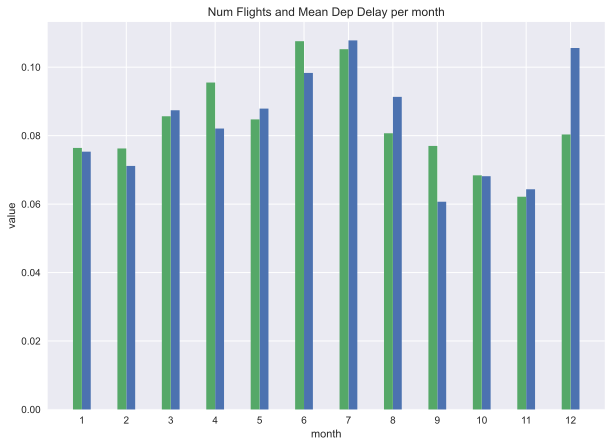

In [460]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.set_title('Num Flights and Mean Dep Delay per month')

x = np.arange(1, 13)

ax.bar(x, n_flight_mnth, label='num flight', align='edge', width=0.2)
ax.bar(x, mean_dep_delay_mnth, label='mean dep delay', align='edge', width=-0.2)

ax.set_xticks(x, x)
ax.set_xlabel('month')
ax.set_ylabel('value')